# Chapter 14 - Unsupervised Learning

### 14.1 - Introduction

* If one supposes that $(X, Y)$ are random variables represented by some joint probability density $Pr(X, Y)$, then supervised learning can be formally characterized as a density estimation problem where one is concerned with determining properties of the conditional density $Pr(Y|X)$. 
* Usually the properties of interest are the "location" parameters $\mu$ that minimize the expected error at each x.
* In unsupervised learning, one has a set of N observations $(x_1, x_2,..., x_N)$ of a random p-vector $X$ having joint density $Pr(X)$. The goal is to directly infer the properties of this probability density without the help of a supervisor or teacher providing correct answers or degree-of-error for each observation.
* Principal components, multidimensional scaling, self-organizing maps, and principal curves, for example, attempt to identify low-dimensional manifolds within the X-space that represent high data density. 
* Cluster analysis attempts to find multiple convex regions of the X-space that contain modes of $Pr(X)$. This can tell whether or not $Pr(X)$ can be represented by a mixture of simpler densities representing distinct types or classes of observations.
* In the context of unsupervised learning, there is no such direct measure of success as there is in supervised learning. It is difficult to ascertain the validity of inferences drawn from the output of most unsupervised learning algorithms. This uncomfortable situation has led to heavy proliferation of proposed methods, since effectiveness is a matter of opinion and cannot be verified directly.

### 14.2 - Association Rules

* The goal is to find joint values of the variables $X = (X_1, X_2, . . . , X_p)$ that appear most frequently in the data base.
* For example, Assume $X_{ij}$ means a customer with transaction $i$ bought item $j$ (binary 0/1).  What combinations of j columns often are seen together? This can be useful for stocking shelves, cross marketing, etc.
* The basic goal of association rule analysis is to find a collection of prototype X-values $v_1,...,v_L$ for the feature vector $X$, such that the probability density $Pr(v_l)$ evaluated at each of those values is relatively large -- the problem can be viewed as "mode finding" or "bump hunting." 
* With many variables, the number of observations where $X = v_l$ will almost always be too small for estimation of $Pr(v_l)$ if you are taking the approach of estimating it with the fraction of observations that are $X = v_l$.
* Instead, we seek regions of the X-space with high probability content relative to their size or support.
* The ultimate goal is to find all item sets/combinations that have a prevalance greater than some lower bound $L$.
* There are reasonable algorithms to compute this -- it exploits the idea that any item set $A$ consisting of a subset of items in $B$ must have support greater than or equal to that of $B$.  So we can start with item sets that are of rank 1 & discard those that are less than or equal to the threshold. Then we go to item sets of 2, ...repeat the process.

**A-priori algorithm**
* The high support item set $K$ returned by a-priori algorithm is cast into a set of association rules -- we partition it into 2 disjoint subsets $A$ and $B$ (not the same as the previous note).  A is called the antecedent and B the consequent. 
*  The "support" of the rule T(A ⇒ B) is the fraction of observations in the union of the antecedent and consequent, which is just the support of the item set K from which they were derived. It can be viewed as an estimate (14.5) of the probability of simultaneously observing both item sets Pr(A and B) in a randomly selected market basket. 
* The "confidence" or "predictability" C(A ⇒ B) of the rule is its support divided by the support of the antecedent which can be viewed as an estimate of Pr(B|A).
* An example query might be "Display all transactions in which ice skates are the consequent that have confidence over 80% and support of more than 2%." This could provide information on those items (antecedent) that predicate sales of ice skates. Focusing on a particular consequent casts the problem into the framework of supervised learning.

**Unsupervised as Supervised**
* The density estimation problem can be transformed into one of supervised function approximation. 
* The main idea here is to find an unknown density $g(x)$ by using a known density $g_0(x)$. Using monte carlo simulation we draw samples from $g_0(x)$ and assign them a value of y = 0. The resulting density is a mixture density. We also use $g(x)$ and assign those values y = 1.  Using the combined data set we can estimate $\mu(x) = E(y|x)$.
* After doing some algebra on $E(y|x)$ based on a mixture mean formula, we can recover a possible value for g(x).
* These estimates may not always be accurate, but they can thus be viewed as "contrast" statistics that provide information concerning departures of the data density $g(x)$ from the chosen reference density $g_0(x)$.
* Choice of reference density might depend on the question you are trying to ask -- for example, is there a departure from the uniform density?

**Generalized Association Rules**
* One might be able to use the "supervised" approach as above to find areas of high density for use in creating association rules.
* Both market basket analysis and the generalized formulation implicitly reference the uniform probability distribution. One seeks item sets that are more frequent than would be expected if all joint data values $(x_1, x_2, \dots, x_N)$ were uniformly distributed.
* The market basket analysis seems to favor items that have high support.  For example, even if vodka => caviar generates a lot of lift, each individual item has low support so their joint support is also low.
* Using the product of the variable marginal data densities as a reference distribution removes the preference for highly frequent values of the individual variables in the discovered item sets.


### 14.3 - Cluster Analysis
* Cluster analysis, also called data segmentation, has a variety of goals. All relate to grouping or segmenting a collection of objects into subsets or "clusters," such that those within each cluster are more closely related to one another than objects assigned to different clusters. 
* In addition, the goal is sometimes to arrange the clusters into a natural hierarchy -- finding clusters of clusters.
* Central to all of the goals of cluster analysis is the notion of the degree of similarity (or dissimilarity) between the individual objects being clustered - this is similar to specifying a cost function in supervised learning.
* Dissimilarity matrix - given N objects, an NxN matrics where $X_{ij}$ represents the dissimilarity between objects $i$ and $j$. Has a 0 diagonal. Converting to similarity would simply require passing each value through an inversion function.

**Distance Functions**
* Most common distance function is squared distance in Euclidean space.
* Other alternative distance functions for quantitative variables are absolute distance and correlation (note this is a similarity measurement, not dissimilarity).
* Ordinal/ranked variables are often transformed via $\frac{i−1/2}{M}, i=1,...,M$ in their original ordering. On this scale they are then treated as quantitative variables.
* Categorical variables with M levels can be delineated in an MxM binary indicator matrix that is sort of the silohuette of the identity matrix (0 on diagonal, 1 otherwise).

**Object Dissimilarity**
* Typically, total object similiarity is computed as a weighted average over the individual variable dissimilarities. Note that setting all weights equal doesn't mean each variable contributes equally. The formula is more complex than that and there is a formula for finding equal weights.
* It is often more productive to use domain expertise & other judgements to set the weights.
* The most common method of incorporating missing values in dissimilarity calculations is to omit these from the calculation.

**Clustering Algorithms**
* Clustering algorithms fall into three distinct types: combinatorial algorithms, mixture modeling, and mode seeking.
* Combinatorial algorithms work directly on the observed data with no direct reference to an underlying probability model. 
* Mixture modeling supposes that the data is an i.i.d sample from some population described by a probability density function. This density function is characterized by a parameterized model taken to be a mixture of component density functions; each component density describes one of the clusters. This model is then fit to the data by maximum likelihood or corresponding Bayesian approaches. 
* Mode seekers ("bump hunters") take a nonparametric perspective, attempting to directly estimate distinct modes of the probability density function. Observations "closest" to each respective mode then define the individual clusters.

**Combinatorial Clustering**
* Assigns K clusters for N data points (K <= N) by optimizing some loss function. For example, minimizing the distance between all points in a cluster.
* Unfortunately, such optimization by complete enumeration is feasible only for very small data sets. For example, assigning 19 obervations to 4 optimal clusters can take $10^{10}$ assignments.
* To make it feasible, we have to take some shortcuts like assigning an initial partitioning strategy.  Then, within those partitions find the optimal subpartitions.

**K-means**
* The K-means algorithm is one of the most popular iterative descent clustering methods. It is intended for situations in which all variables are of the quantitative type.
* We select K initial means to server as clusters centroids.
* Points are added to the nearest cluster and shift the centroids.
* The goal is minimize the average dissimilarity from the cluster mean.
* One should start the algorithm with many different random choices for the starting means, and choose the solution having smallest value of the objective function.

**Vector Quantization**
* The K-means clustering algorithm represents a key tool in the apparently unrelated area of image and signal compression, particularly in vector quantization or VQ.
* Many portions of an image look the same (blocks of all white pixels for example).  We can perform K means in this context to make a 200x200 pixel image become a 50x50 block image where each block is a k-means mean. This is an example of lossy compression. A lossless algorithm could still take advantage of similarities in pixel colors but would not do any type of averaging or approximation.

**K-Medoids Clustering**
* Using squared Euclidean distance places the highest influence on the largest distances. This causes the procedure to lack robustness against outliers that produce very large distances.
* The only part of the K-means algorithm that assumes squared Euclidean distance is the minimization step.
* The algorithm can be generalized for use with arbitrarily defined dissimilarities  by replacing this step by an explicit optimization. In the most common form, centers for each cluster are restricted to be one of the observations assigned to the cluster. This algorithm assumes attribute data, but the approach can also be applied to data described only by proximity matrices

**Practical Issues**
* Choice of K (number of clusters to use) is usually driven and defined by the problem at hand. (e.g. we have K salespeople to assign N customers).
* However, sometimes we don't know K and are trying to figure out how many distinct groupings a data set might have.
* Data-based methods for estimating K typically examine the within-cluster dissimilarity as a function of the number of clusters K.
* Within-cluster dissimilarity typically decreases with increasing K.

**Hierarchical Clustering**
* The results of applying K-means or K-medoids clustering algorithms depend on the choice for the number of clusters to be searched and a starting configuration assignment. In contrast, hierarchical clustering methods do not require such specifications.
* Instead, they require the user to specify a measure of dissimilarity between (disjoint) groups of observations, based on the pairwise dissimilarities among the observations in the two groups.
* As the name suggests, they produce hierarchical representations in which the clusters at each level of the hierarchy are created by merging clusters at the next lower level. 
* At the lowest level, each cluster contains a single observation. 
* At the highest level there is only one cluster containing all of the data.
* Agglomerative strategies start at the bottom and at each level recursively merge a selected pair of clusters into a single cluster. This produces a grouping at the next higher level with one less cluster. The pair chosen for merging consist of the two groups with the smallest intergroup dissimilarity.
* Divisive methods start at the top and at each level recursively split one of the existing clusters at that level into two new clusters. The split is chosen to produce two new groups with the largest between-group dissimilarity. 
* It is up to the user to decide which level of the hierarchy is most "natural".
* The dissimilarity $d(G,H)$ between G and H is computed from the set of pairwise observation dissimilarities $d_{ii′}$ where one member of the pair i is in G and the other $i′$ is in H. 
* Single-linkage dissimilarity just finds the cluster with the minimum pair dissimilarity. Also called nearest neighbor technique. 
* Complete-linkage / furthest neighbor takes the cluster with the maximum pair dissimilarity.
* Group average will take the mean pair dissimilarity between clusters.

Data:
[[ 2.79843356  2.27470477]
 [ 2.53005911  2.87830499]
 [ 3.2780683   2.58894425]
 [ 2.08976026  1.61464356]
 [ 2.20474396  2.03762395]
 [ 3.08063244  2.69396499]
 [ 2.23756629  3.51414617]
 [ 2.44175516  2.35076855]
 [ 1.10636767  3.40336943]
 [ 1.7394638   2.90412719]
 [ 2.32859942  2.62974661]
 [ 1.9595157   3.84247679]
 [ 2.94611902  1.84767565]
 [ 3.06593047  3.50758204]
 [ 2.22157249  3.07766279]
 [ 2.75327041  2.3389151 ]
 [ 2.5740756   3.03728379]
 [ 2.74744775  2.04560625]
 [ 2.29230798  1.65603364]
 [ 1.94720779  0.92637273]
 [-1.5499242  -0.54221727]
 [-2.14698768 -3.65491894]
 [-1.49629521 -4.32407829]
 [-2.06423891 -2.55449872]
 [-3.13062195 -1.62472235]
 [-3.19846565 -1.01571087]
 [-1.43537764 -2.53659318]
 [-4.10437112 -2.92939413]
 [-1.9032882  -3.30232434]
 [-2.25802833 -2.47315255]
 [-2.54420779 -3.16128005]
 [-4.02327264 -3.49496728]
 [-2.80627652 -3.19328171]
 [-2.02584108 -1.97214685]
 [-3.16590382 -3.21791144]
 [-2.52018147 -2.84263465]
 [-3.00658407 -1.69818

Text(0.5, 1.0, 'K-Means Clustering Example')

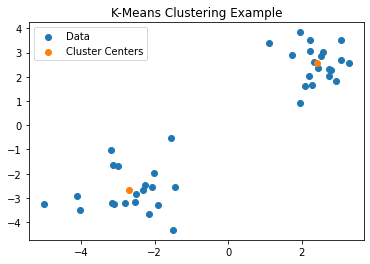

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate gaussian noise with 2 distinct means
X = np.vstack([np.random.normal([2.5, 2.5], 0.5, [20, 2]), np.random.normal([-2.5, -2.5], 1, [20, 2])])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print('Data:')
print(X)
print('')
print('Labels:')
print(kmeans.labels_)
print('')
print('Prediction:')
print(kmeans.predict([[0, 0], [4, 4]]))
print('')
print('Cluster centers:')
print(kmeans.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.legend(['Data', 'Cluster Centers'])
plt.title('K-Means Clustering Example')

### 14.4 - Self Organizing Maps

* This method can be viewed as a constrained version of K-means clustering, in which the prototypes are encouraged to lie in a one-or-two-dimensional manifold in the feature space.
* The prototypes are initially organized to lie in the two-dimensional principal component plane of the data.
* The SOM procedure tries to bend the plane so that the prototypes approximate the data points as well as possible. Once the model is fit, the observations can be mapped down onto the two-dimensional grid.
* The observations $x_i$ are processed one at a time. We find the closest prototype $m_j$ to $x_i$ in Euclidean distance in $\mathbb{R}^p$, and then for all neighbors $m_k$ of $m_j$, move $m_k$ toward $x_i$.
* The neighbors $m_k$ are defined by a hyper-parameter Euclidean distance neighborhood.
* Distance is defined in the space Q1 × Q2 of integer topological coordinates of the prototypes, rather than in the feature space $\mathbb{R}^p$.

### 14.5 - Principal Components, Curves and Surfaces

**Principal Components**
* Principal components are a sequence of projections of the data, mutually uncorrelated and ordered in variance.
* The principal components of a feature space are the orthogonal vectors describing the space, ordered by variance. We can choose the top $k$ principal components and project the original data into this lower dimensional hyperplane. 
* Finding the principal components can be done via an SVD decomposition of the centered feature matrix.
* Principal components are a useful tool for dimension reduction and compression. 
* Principal curves generalize the principal component line, providing a smooth one-dimensional curved approximation to  a set of data points in $\mathbb{R}^p$. A principal surface is more general, providing a curved manifold approximation of dimension 2 or more.

**Principal Curves**

*Consider an abstract distribution and not real data for the following:*
* A curve $f(\lambda)$ is considered a principal curve if it is the average of all data points that project to it.
* Continuous multi-variate distributions have infinitely many prinicpal curves, but we are mainly interested in the smooth ones.
* The set of k points that minimize the expected distance from X to its prototypes (defined by the k points) are called the principal points of the distribution. 
* Principal points are the distributional analogs of centroids found by K-means clustering. 
* Principal curves can be viewed as $k = \infty$ principal points, but constrained to lie on a smooth curve.
*  Principal surfaces have exactly the same form as principal curves, but are of higher dimension. The mostly commonly used is the two-dimensional principal surface, with coordinate functions $f(\lambda_1, \lambda_2)$.

**Spectral Clustering**
* Traditional clustering methods like K-means use a spherical or elliptical metric to group data points. Hence they will not work well when the clusters are non-convex. 
* Spectral clustering is a generalization of standard clustering methods, and is designed for these situations.
* The starting point is a $N × N$ matrix of pairwise similarities $s_{ii}′ \geq 0$ between all observation pairs. 
* We represent the observations in an undirected similarity graph G = ⟨V, E⟩. The N vertices $v_i$ represent the observations, and pairs of vertices are connected by an edge if their similarity is positive (or exceeds some threshold). The edges are weighted by the $s_{ii′}$. 
* Clustering is now rephrased as a graph-partition problem, where we identify connected components with clusters. We wish to partition the graph, such that edges between different groups have low weight, and within a group have high weight.
* Spectral clustering finds the $m$ eigenvectors corresponding to the m smallest eigenvalues of $L$, where $L$ is the graph Laplacian which is defined as $L = G-W$. $G$ is the diagonal matrix representing the degree of each vertex (the sum of weights on edges connected to it) and $W$ is the adjaceny matrix, which is a matrix of edge weights.

**Kernel Principal Components**
* Spectral clustering is related to kernel principal components, a non-linear version of linear principal components. 
* Standard linear principal components (PCA) are obtained from the eigenvectors of the covariance matrix, and give directions in which the data have maximal variance.
* Kernel PCA expands the scope of PCA, mimicking what we would obtain if we were to expand the features by non-linear transformations, and then apply PCA in this transformed feature space.
* Kernel PCA is quite sensitive to the scale and nature of the kernel. 

**Sparse Principal Components**
* We often interpret principal components by examining the direction vectors $v_j$, also known as loadings, to see which variables play a role. Often this interpretation is made easier if the loadings are sparse.
* Methods for deriving principal components with sparse loadings are often based on the Lasso technique.
* One method solves for principal components subject to the constraint $\sum_{j=1}^{p} |vj| \leq t$.
* The absolute-value constraint encourages some of the loadings to be zero and hence v to be sparse. 
* Further sparse principal components are found in the same way, by forcing the kth component to be orthogonal to the first k − 1 components. Unfortunately this problem is not convex and the computations are difficult.
* Other methods follow a similar approach of putting a constraint on the eigenvectors/loadings.

### 14.6 - Non-negative Matrix Factorization
* Non-negative matrix factorization is a recent alternative approach to principal components analysis, in which the data and components are assumed to be non-negative. It is useful for modeling non-negative data such as images.
* It is found by maximizing the log-likelihood from a model in which $x_{ij}$ has a Poisson distribution — quite reasonable for positive data.
* The $N × p$ data matrix $X$ is approximated by $X ≈ WH$ where $W$ is $N × r$ and $H$ is $r×p$.

**Archetypal Analysis**
* Approximates data points by prototypes that are themselves linear combinations of data points. In this sense it has a similar flavor to K-means clustering. 
* Rather than approximating each data point by a single nearby prototype, archetypal analysis approximates each data point by a convex combination of a collection of prototypes. 
* Again we assume $X ≈ WH$. The N data points are represented by convex combinations of the r archetypes (rows of H).
* The use of a convex combination forces the prototypes to lie on the convex hull of the data cloud (on the edge of the boundaries). In this sense, the prototypes are "pure", or "archetypal".
* Convex combinations are linear combinations whose coefficients are > 0 and whose weights sum to 1.

### 14.7 - Independent Component Analysis and Exploratory Projection Pursuit

* Factor analysis is a classical technique developed in the statistical literature that aims to identify latent variables -- those that are not directly observed but whose effects can be covered by other variables in a multivariate model (driving forces that may be hard to identify or measure).
* In terms of random variables, we can interpret the SVD, or the corresponding principal component analysis (PCA), as an estimate of a latent variable model X = AS.  The correlated $X_j$ are each represented as a linear expansion in the uncorrelated, unit variance variables $S_l$. This is saying that each variable is represented as a linear combination of variables $S_l$ where $S = \sqrt{N}U$ in the SVD decomposition $X=UDV^T$.
* There are many such decompositions, and it is therefore impossible to identify any particular latent variables as unique underlying sources. The classical factor analysis model, developed primarily by researchers in psychometrics, alleviates these problems to some extent.
* In classifical factor analysis, let $X = AS + ε$. Here S is a vector of q < p underlying latent variables or factors, A is a p × q matrix of factor loadings, and the $ε_j$ are uncorrelated zero-mean disturbances. The idea is that the latent variables $S_l$ are common sources of variation amongst the $X_j$ , and account for their correlation structure, while the uncorrelated $ε_j$ are unique to each $X_j$ and pick up the remaining unaccounted variation. 
* Typically the $S_j$ and the $ε_j$ are modeled as Gaussian random variables, and the model is fit by maximum likelihood.

**Independent Component Analysis**
* The independent component analysis (ICA) model has exactly the same form, except the $S_i$ are assumed to be statistically independent rather than uncorrelated. 
* Cocktail party problem, where different microphones $X_j$ pick up mixtures of different independent sources $S_l$ (music, speech from different speakers, etc.). ICA is able to perform blind source separation, by exploiting the independence and non-Gaussianity of the original sources.
* Many of the popular approaches to ICA are based on entropy. 
* A well-known result in information theory says that among all random variables with equal variance, Gaussian variables have the maximum entropy.
* ICA applied to multivariate data looks for a sequence of orthogonal projections such that the projected data look as far from Gaussian as possible. With pre-whitened data, this amounts to looking for components that are as independent as possible.
* ICA starts from essentially a factor analysis solution, and looks for rotations that lead to independent components. From this point of view, ICA is just another factor rotation method.

**Exploratory Projection Pursuit**
* Exploratory projection pursuit is a graphical exploration technique for visualizing high-dimensional data.
* Their view was that most low (one or two-dimensional) projections of high-dimensional data look Gaussian. 
* Interesting structure, such as clusters or long tails, would be revealed by non-Gaussian projections.

**A Direct Approach to ICA**
* Independent distributions by definition have a joint density function that is the product of their individual densities.
* The authors present an approach that estimates this density directly using generalized additive models.

### 14.8 - Multidimensional Scaling
* Both self-organizing maps and principal curves and surfaces map data points in $R^p$ to a lower-dimensional manifold. Multidimensional scaling (MDS) has a similar goal, but approaches the problem in a somewhat different way.
* The idea is to find a lower-dimensional representation of the data that preserves the pairwise distances between points as well as possible.

### 14.9 - Nonlinear Dimension Reduction and Local Multidimensional Scaling
* Several methods have been recently proposed for nonlinear dimension reduction, similar in spirit to principal surfaces. 
* The idea is that the data lie close to an intrinsically low-dimensional nonlinear manifold embedded in a high-dimensional space. 
* These methods can be thought of as "flattening" the manifold, and hence reducing the data to a set of low-dimensional coordinates that represent their relative positions in the manifold. 
* They are useful for problems where signal-to-noise ratio is very high (e.g., physical systems), and are probably not as useful for observational data with lower signal-to-noise ratios.
* Isometric feature mapping (ISOMAP) constructs a graph to approximate the geodesic distance between points along the manifold. 
* Local linear embedding takes a very different approach, trying to preserve the local affine structure of the high-dimensional data. Each data point is approximated by a linear combination of neighboring points. Then a lower dimensional representation is constructed that best preserves these local approximations.
* Local MDS defines a neighborhood using K-nearest neighbors.  It then minimizes the same stress function as in MDS but points that are not neighbors are weighted to be very far apart; such pairs are given a small weight w so that they don’t dominate the overall stress function. 

### 14.10 - The Google PageRank Algorithm

* Suppose that we have N web pages and wish to rank them in terms of importance.
* The PageRank algorithm considers a webpage to be important if many other webpages point to it.
* However, the linking webpages that point to a given page are not treated equally: the algorithm also takes into account both the importance (PageRank) of the linking pages and the number of outgoing links that they have. 
* Linking pages with higher PageRank are given more weight, while pages with more outgoing links are given less weight.
* This algorithm is therefore defined recursively.